<a href="https://colab.research.google.com/github/jon-bown/euclid/blob/master/euclid_s_elements_book_1_prop_1_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center; color:#1565c0;">Euclid's Elements of Geometry</h1>


<h2 style="text-align:center; font-weight:normal;">Book 1: Fundamentals of Plane Geometry Involving Straight Lines</h2>
<h2 style="text-align:center; font-weight:normal;">Propositions 1-20</h2>

<div align='center'>
<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/8/8d/P._Oxy._I_29.jpg" alt="Trulli" width=500>
</figure>
</div>

<blockquote style="font-style:italic; margin:20px 0; padding:10px; border-left:5px solid #1565c0; background-color:#f2f2f2;">
    "If Euclid failed to kindle your youthful enthusiasm, then you were not born to be a scientific thinker."<br>
    - Albert Einstein (On The Method of Theoretical Physics)
</blockquote>

Much of my academic training was spent learning mathematics. It has long been a desire of mine to dig deeper into important mathematical works throughout history. At the top of the list has always been Euclid's Elements, otherwise known as 'The Elements'. Some fun facts about this important mathematical work:



* Often referred to as the most successful or influential textbook ever written
* It was one of the earliest mathematical works to be published after the invention of the printing press
* Second only to the Bible in number of editions published since 1482
* Influenced many scientists including: Copernicus, Kepler, Galileo, Einstein and Newton
* Used to be required in the ciriculum of all university students


This notebook will take you through the first 20 propositions in Book 1. Instead of doing the proofs by hand, they are done using python classes and visualizations. The overall question I asked when starting this was 'can all this be done using python code without loss of generality?'. 

The Elements is written as if you have a ruler and a compass handy to draw lines and circles. One of the postulates basically says 'lets assume you can draw a perfect circle'. 

This is obviously not available in python as an object by default, so there are some classes and functions that are used in place of what would be available on a piece of paper. For example, the intersections of two or more circles is assumed to be visually available. The aim is to preserve the logic laid out in the propositions in the python code and create classes that implement the propositions as functions. 

Euclid gave us logic and proof of the claims but he also gave us algorithms for working in two dimensional geometry in Book 1. As the propositions progress in this notebook, I rely less and less on the exact proof laid out in the text. The work done in the first few propositions make life easier when say, drawing an equilateral triangle. I don't need to go through the proof of proposition 1 every time I want to draw one. I rely on already established functions and classes to follow the logic of the current proof and continue to abstract away the less important details. 

The backbone of this notebook is a pre-existing python package conveniently titled 'Euclid'. The package and corresponding documentation can be found here: [Euclid](https://github.com/aholkner/euclid). Everything additional is either my own or specifically cited accordingly. 

A few sidenotes before starting:

- You'll notice the frequent use of rounding throughout this notebook, this is purely to ensure float precision when building geometric objects in two dimensions. The actual values numericaly are irrational numbers and need to be truncated in order to make sense. This is purely a computational constraint and not a geometric one. The calculations and proofs still hold despite this truncation.
- The language of the propositions is a bit simplified compared to the pure latin translation. This is to make your life easier when reading it. The text used to put this notebook together was by Richard Fitzpatrick which includes a more modern english translation of the original writings.
- I take some liberties with cosine and sine

In [2]:
!pip install euclid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for euclid: filename=euclid-1.2-py3-none-any.whl size=21723 sha256=e8d97a52256c874609e3103748a1da796a593a428de9ff313603aad0f43ae5cf
  Stored in directory: /root/.cache/pip/wheels/ac/ad/8d/4d60314e38c1e005667e5089bfbc021b05bd8cae82b7ca34a4
Successfully built euclid


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from euclid import *
import math
import random
import euclid

# Definitions

The following is used to intoduced some syntax with the Euclid package and testing that it works properly. I will not list out all the definitions, just the ones relevant to the propositions 1-20

1. A point is that of which there is no part.

2. And a line is a length without breadth.

3. And the extremities of a line are points.

4. A straight-line is one which lies evenly with points on itself.

9. And when the lines containing the angle are straight then the angle is called **rectilinear**.

11. An obtuse angle is one greater than a right-angle.

12. And an acute angle is one less than a right-angle.

13. A boundary is that which is the extremity of something.

15. A circle is a plane figure contained by a single line, all of the straight-lines radiating towards from one point amongst those lying inside the figure are equal to one another. 

# Postulates

These are five main abstractions that allow the proofs presented by Euclid to be possible.

1. Let it have been postulated to draw a straight-line from any point to any point.

In [4]:
Line2(Point2(0,0), Point2(0,1))

Line2(<0.00, 0.00> + u<0.00, 1.00>)

Notice here that a Line2 object in the Euclid package has a starting point + a unit times another point. This is similar to a vector, internally there are two points stored but the main representation is a point and a magnitude.

2. And to produce a finite straight-line continuously in a straight-line.

In [5]:
LineSegment2(Line2(Point2(0,0), Point2(0,1)))

LineSegment2(<0.00, 0.00> to <0.00, 1.00>)

In [6]:
#One method provided by the euclid package is .connect which produces a straight line (the shortest)
Point2(0,0).connect(Point2(0,1))

LineSegment2(<0.00, 0.00> to <0.00, 1.00>)

3. And to draw a circle with any center and radius.

In [7]:
c = Circle(Point2(0,0), 2.0)
#CENTER
print(c.c)
#RADIUS
print(c.r)

Point2(0.00, 0.00)
2.0







4. And that all right-angles are equal to one another. 

In [8]:
A = Vector2(-1,1)
B = Vector2(1,1)
C = Vector2(0,1)
D = Vector2(1,0)
#AB = Line2(A, B)
np.degrees(A.angle(B)) == np.degrees(C.angle(D))

True

# Common Notions

1. Things equal to the same thing are also equal to one another

In [9]:
p = Point2(1.0, 2.0)
p1 = p
p2 = p
print(p1 == p2)

True


2. And if equal things are added to equal things then the wholes are equal

In [10]:
p1 = Point2(1.0, 1.0)
p2 = Point2(2.0, 2.0)
p3 = Point2(1.0, 1.0)
p4 = Point2(2.0, 2.0)

In [11]:
p1 + p2 == p3 + p4

True

3. And if equal things are subtracted from equal things then the remainders are equal.

In [12]:
p1 - p2 == p3 - p4

True

4. And things coinciding with one another are equal to one another

This essentially means that if two objects or figures can be exactly superimposed on each other, then they are equal in size, shape, and other properties. In the context of geometry, this principle is often used to show the congruence of geometric figures, such as triangles, rectangles, or other polygons. If you can place one figure on top of the other and they completely cover each other without any gaps or overlaps, then they are equal, or congruent, in all aspects.

5. And the whole is greater than the part

In the context of geometry and mathematics, this notion implies that when you have a complete figure or quantity, any proper subset or portion of that figure or quantity will always be smaller than the whole. For example, if you have a line segment, any smaller segment within the original line segment will always be shorter in length than the entire line segment.

# Euclid Library Extensions

The current version of the 'euclid' package is very minimal. I'm going to need some more convenient functions that implement the postulates so that I don't have to worry about details that are meant to be treated as a 'given' or have to unecessarily repeat myself. 

In [13]:
#EXTEND EUCLID CIRCLE CLASS TO GET INTERSECTION POINTS
class Circle2E(euclid.Circle):

    def get_intersections(self, c2):
        """
        get intersections of self and another circle (which is at most two points, proven later by Euclid)
        """
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1
        if not isinstance(c2, Circle2E):
            raise AttributeError("Must pass euclid Circle")
        
        x0 = self.c.x
        y0 = self.c.y
        r0 = self.r
    
        x1 = c2.c.x
        y1 = c2.c.y
        r1 = c2.r

        d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    
        # non intersecting
        if d > r0 + r1 :
            return None
        # One circle within other
        if d < abs(r0-r1):
            return None
        # coincident circles
        if d == 0 and r0 == r1:
            return None
        else:
            a=(r0**2-r1**2+d**2)/(2*d)
            h=math.sqrt(r0**2-a**2)
            x2=x0+a*(x1-x0)/d   
            y2=y0+a*(y1-y0)/d   
            x3=x2+h*(y1-y0)/d     
            y3=y2-h*(x1-x0)/d 

            x4=x2-h*(y1-y0)/d
            y4=y2+h*(x1-x0)/d
        
        return (x3, y3, x4, y4)

In [14]:
class Point2E(euclid.Point2):
    def __eq__(self, other):
        return (round(self.x,2), round(self.y, 2)) == (round(other.x,2), round(other.y,2))

In [15]:
class Line2E(euclid.Line2):
    def __len__(self):
        return round(self.p1.distance(self.p2), 2)
    def random_point(self):
        """
        Returns random point along line
        """
        t = random.random()  # Random value between 0 and 1
        #Use convexity of line to interpolate
        x = self.p1.x + t * (self.p2.x - self.p1.x)
        y = self.p1.y + t * (self.p2.y - self.p1.y)

        return Point2E(x, y)
    def angle(self, other: euclid.Geometry):
        return self.v.angle(other.v)
    def plot(self):
        return None

In [16]:
class Rectilinear():
    """
    Constructs a rectilinear with apex C jointing two lines at angle/2 from center
    """
    def __init__(S1: float, angle: float, S2: float):
        #construct point apex
        self.C = Point2E(0,0)
        #construct first side with length S1
        xb = round(S1 * math.cos(math.radians(270-angle/2)),2)
        yb = round(S1 * math.sin(math.radians(270-angle/2)),2)
        self.A = Point2E(xb, yb)
        a = Line2E(C, B)
        #construct next side with length S2 making angle A with side 1
        x2 = round(S2 * math.cos(math.radians(270+angle/2)), 2)
        y2 = round(S2 * math.sin(math.radians(270+angle/2)), 2)
        self.B = Point2E(x2, y2)
        self.a = Line2E(C, A)
        #take two final points and connect with line, pass to constructor
        self.b = Line2E(B, A)
    def plot(self):
        return None

In [17]:
def angle_btw_lines(L1, L2):
    """
    Calculate the angle between two lines internal to the two lines in the context of a triangle
    """
    # Find the common point
    common_point = None
    for p in [L1.p1, L1.p2]:
        if p in [L2.p1, L2.p2]:
            common_point = p
            break

    if common_point is None:
        return np.nan

    # Adjust the vectors to point inwards
    v1 = L1.v if L1.p1 == common_point else -L1.v
    v2 = L2.v if L2.p1 == common_point else -L2.v

    # Calculate the angle using the dot product formula
    cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle = np.arccos(np.clip(cos_angle, -1, 1))

    return round(np.degrees(angle), 2)

In [19]:
# Validity of Triangle given sides
# SRC: https://www.codesansar.com/python-programming-examples/check-validity-triangle-given-sides.htm
def is_valid_triangle(a,b,c):
    """
    Checks if three given side lengths will form a triangle
    """
    if a+b>=c and b+c>=a and c+a>=b:
        return True
    else:
        return False

In [88]:
# gets offset of annotation from centroid and points of triangles
def get_offset(centroid, point, scale=0.2):
    dx = point[0] - centroid[0] - scale
    dy = point[1] - centroid[1]
    return (point[0] + dx * 0.2, point[1] + dy * scale)

In [103]:
def extend_point2_circle_edge(cir: Circle, point: Point2, angle: float):
  angle_rad = angle

  # Calculate the X and Y offsets
  offset_x = cir.r * np.cos(angle_rad)
  offset_y = cir.r * np.sin(angle_rad)

  # Calculate the coordinates of the point on the circle's edge
  point_x = cir.c.x + offset_x
  point_y = cir.c.y + offset_y
  return Point2E(point_x, point_y)

To implement a Triangle object, each component will be set up to follow this pattern.

<div align='center'>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Triangle_with_notations_2.svg/2560px-Triangle_with_notations_2.svg.png" width=500/>
    </div>

In [111]:
"""
A triangle is a shape composed of three points, lines connecting those points, and three angles between each line.
"""
class Triangle():
    def __init__(self, a: Line2E, b: Line2E, c: Line2E):
        self.a = a
        self.b = b
        self.c = c
        self.equilateral = (round(a.__len__(),2) == round(b.__len__(), 2)) and (round(b.__len__(), 2) == round(c.__len__(), 2))
        self.A = c.p2
        self.B = c.p1
        self.C = a.p1

        self.centroid = ((self.A[0] + self.B[0] + self.C[0]) / 3, (self.A[1] + self.B[1] + self.C[1]) / 3)

        
        #each angle
        self.beta = angle_btw_lines(a, c)
        self.alpha = angle_btw_lines(c, b)
        self.gamma = angle_btw_lines(a, b)
        
        self.min_x = min(c.p2.x, c.p1.x, a.p1.x)
        self.max_x = max(c.p2.x, c.p1.x, a.p1.x)
        self.min_y = min(c.p2.y, c.p1.y, a.p1.y)
        self.max_y = max(c.p2.y, c.p1.y, a.p1.y)
    @classmethod
    def SAS(cls, S1: float, angle: float, S2: float):
        """
        Constructs a triangle from two side lengths and an angle between the two sides. 
        """
        #construct point apex
        C = Point2E(0,0)
        #construct first side with length S1
        xb = round(S1 * math.cos(math.radians(270-angle/2)),2)
        yb = round(S1 * math.sin(math.radians(270-angle/2)),2)
        B = Point2E(xb, yb)
        a = Line2E(C, B)
        #construct next side with length S2 making angle A with side 1
        x2 = round(S2 * math.cos(math.radians(270+angle/2)), 2)
        y2 = round(S2 * math.sin(math.radians(270+angle/2)), 2)
        A = Point2E(x2, y2)
        b = Line2E(C, A)
        #take two final points and connect with line, pass to constructor
        c = Line2E(B, A)
        return cls(a, b, c)
    @classmethod
    def AAA(cls, a1: float, a2: float, a3: float):
        """
        Constructs triangle with three given angle sizes in degrees
        """
        return None
    @classmethod
    def SSS(cls, S1: float, S2: float, S3: float):
        """
        Constructs a triangle with given lengths (side, side, side)
        S1 - a
        S2 - b
        S3 - c
        """
        
        if not is_valid_triangle(S1, S2, S3):
            print("Invalid Triangle Specification")
            return None
        C = Point2E(0,0)
        B = Point2E(0, 0 - S1)
        a = Line2E(C, B)
        #determine angle to move to point A
        beta = np.degrees(np.arccos((S1**2+S2**2-S3**2)/(2*S1*S2)))
        print(beta)
        x2 = round(S2 * math.cos(math.radians(90+beta)), 2)
        y2 = round(S2 * math.sin(math.radians(90+beta)), 2)
        A = Point2E(x2, y2)
        c = Line2E(B, A)
        b = Line2E(A, C)
        return cls(a, b, c)
    @classmethod
    def ASA(cls, a1: float, S: float, a2: float):
        """
        Constructs triangle with two base angles and base side length
        """
        B = Point2E(0.0, 0.0)
        C = Point2E(B.x+S, 0.0)
        BC = Line2E(B, C)
        xc = C.x + round(S*math.cos(math.radians(180-a2)),2)
        yc = round(S*math.sin(math.radians(a2)),2)
        tempC = Line2E(Point2E(xc, yc), C)
        xb = round(S*math.cos(math.radians(a1)), 2)
        yb = round(S*math.sin(math.radians(a1)), 2)
        tempB = Line2E(B, Point2E(xb, yb))
        A = tempB.intersect(tempC)
        A = Point2E(A.x, A.y)
        AC = Line2E(A, C)
        AB = Line2E(A, B)
        return cls(AB, BC, AC)
    
    def plot(self, title='', full=True, ax=None, annotate=True):
        #should be adapted to length of triangle
        if ax == None:
          fig, ax = plt.subplots()
        plt.plot([self.a.p1.x, self.a.p2.x], [self.a.p1.y, self.a.p2.y], marker='o', label='a')
        plt.plot([self.b.p1.x, self.b.p2.x], [self.b.p1.y, self.b.p2.y], marker='o', label='b')
        plt.plot([self.c.p1.x, self.c.p2.x], [self.c.p1.y, self.c.p2.y], marker='o', label='c')

        if ax != None and annotate:
          ax.annotate('C', self.C, get_offset(self.centroid, self.B), fontsize=12)
          ax.annotate('A', self.A, get_offset(self.centroid, self.C), fontsize=12)
          ax.annotate('B', self.B, get_offset(self.centroid, self.A), fontsize=12)

        if full:
          plt.title(title)
          plt.legend()
          plt.tight_layout()
          plt.show()
    def check_angles(self):
        return self.beta + self.alpha + self.gamma
        

In [118]:
def plot_2d(objs, names, colors, annotate=True, edge=0.1, size=5, title='', legend_loc='upper right'):
    """
    Plot 2D Euclid Elements
    
    Plots according to figsize of 'size' and edges away from max/min +/- 'edge'
    
    objs = List of objects to plot
    names = List of names of objects to show on legend
    colors = List of colors applied to each object
    
    """
    #figsize=(size, size)
    fig, ax = plt.subplots()
    min_x, max_x, min_y, max_y = None, None, None, None
    for i, obj in enumerate(objs):
        if isinstance(obj, Circle2E):
            circle1=plt.Circle((obj.c.x, obj.c.y), obj.r, fill=False, color=colors[i], label=names[i])
            plt.gca().add_artist(circle1)
            
            #adjust boundaries
            min_x = min(min_x, obj.c.x - obj.r) if min_x is not None else obj.c.x - obj.r
            max_x = max(max_x, obj.c.x + obj.r) if max_x is not None else obj.c.x + obj.r
            min_y = min(min_y, obj.c.y - obj.r) if min_y is not None else obj.c.y - obj.r
            max_y = max(max_y, obj.c.y + obj.r) if max_y is not None else obj.c.y + obj.r
        elif isinstance(obj, Line2):
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], marker='o', label=names[i])
            if len(names[i]) > 1 and annotate:
              ax.annotate(names[i][0], (obj.p1.x-0.15, obj.p1.y-0.03), fontsize=14)
              ax.annotate(names[i][1], (obj.p2.x+0.03, obj.p2.y-0.03), fontsize=14)
            
            #adjust boundaries
            min_x = min(min_x, obj.p1.x, obj.p2.x) if min_x is not None else min(obj.p1.x, obj.p2.x)
            max_x = max(max_x, obj.p1.x, obj.p2.x) if max_x is not None else max(obj.p1.x, obj.p2.x)
            min_y = min(min_y, obj.p1.y, obj.p2.y) if min_y is not None else min(obj.p1.y, obj.p2.y)
            max_y = max(max_y, obj.p1.y, obj.p2.y) if max_y is not None else max(obj.p1.y, obj.p2.y)
        elif isinstance(obj, Triangle):
            obj.plot(full=False, ax=ax, annotate=annotate)


            min_x = min(min_x, obj.min_x) if min_x is not None else obj.min_x
            max_x = max(max_x, obj.max_x) if max_x is not None else obj.max_x
            min_y = min(min_y, obj.min_y) if min_y is not None else obj.min_y
            max_y = max(max_y, obj.max_y) if max_y is not None else obj.max_y
            continue
    plt.title(title)
    plt.axis([min_x - edge*(max_x-min_x), max_x + edge*(max_x-min_x), min_y - edge*(max_y-min_y), max_y + edge*(max_y-min_y)])
    plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()
        

# Proposition 1: Construct an Equilateral Triangle

In [119]:
#Let AB be the given finite straight line
A = Point2(0,1)
B = Point2(1,1)
AB = Line2E(A, B)
# Let the circle BCD with center A and radius AB have been drawn
radius = A.distance(B)
BCD = Circle2E(A, radius)
# let the circle ACE with center B and radius BA have been drawn
ACE = Circle2E(B, radius)
points = BCD.get_intersections(ACE)
C = Point2(points[2],points[3])
# And let the straight-lines CA and CB have been joined from the point C, 
# where the circles cut one another to the points A and B.
CA = Line2E(C, A)
CB = Line2E(C, B)

ABC = Triangle(AB, CA, CB)

In [41]:
#Initial Checks
print(ABC.alpha + ABC.beta + ABC.gamma)
print(ABC.equilateral)

180.0
True


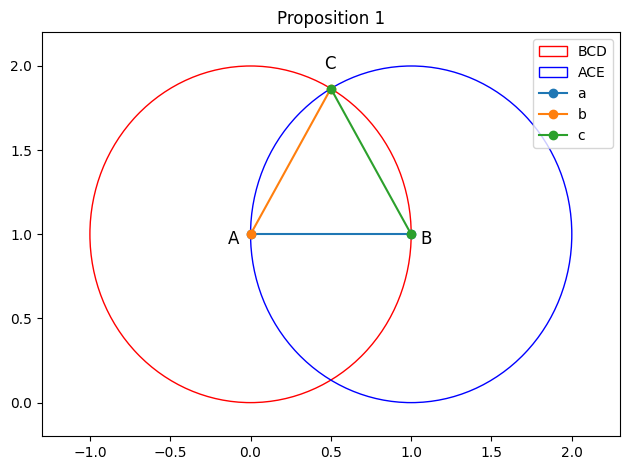

In [121]:
plot_2d([BCD, ACE, ABC], ['BCD','ACE','ABC'], colors=['red', 'blue', 'green'], title='Proposition 1')

In [97]:
#ABSTRACTION OF PROP 1
def draw_equilateral(AB: Line2E, direction=1):
    """
    Given a line, construct an equliateral triangle with a new point C
    """
    A = AB.p1
    B = AB.p2
    radius = A.distance(B)
    print(radius)
    BCD = Circle2E(A, radius)
    ACE = Circle2E(B, radius)
    points = BCD.get_intersections(ACE)
    if direction == 1:
        C = Point2E(points[2],points[3])
    else:
        C = Point2E(points[0],points[1])
        
    print(f'C = {C.x}, {C.y}')
    b = Line2E(A, C)
    a = Line2E(C, B)
    c = Line2E(B, A)
    print(a.__len__())
    print(b.__len__())
    print(c.__len__())
    ABC = Triangle(a, b, c)
    return ABC

# Proposition 2: To place a straight-line equal to a given straight-line at a given point (as an extremety)

In [132]:
# Let A be the given point, 
A = Point2(-1,-1)

#Let BC the given straight-line. 
B = Point2(1, -1)
C = Point2(1, 4)
BC = Line2(B, C)

# Let AB have been joined from A to B
AB = Line2(A, B)

#Let eq. triangle DAB have been constructed upon it
DAB = draw_equilateral(AB)
print("DAB Equilateral Check: ", DAB.equilateral)
D = DAB.C

# Let straight-lines AE and BF have been produced in a straight-line with DA/DB
E = A - 6*DAB.b.v.__truediv__(DAB.b.v.__abs__())
F = B + 6*DAB.a.v.__truediv__(DAB.a.v.__abs__())
AE = Line2(A, E)
BF = Line2(B, F)

#And let the circle CGH with center D and radius BC have been drawn
CGH = Circle2E(B, B.distance(C))

#Let the circle GKL with center D and radius DG have been drawn
G = euclid._connect_point2_circle(F, CGH).p2
GKL = Circle2E(D, D.distance(G))
L = euclid._connect_point2_circle(E, GKL).p2
AL = Line2(A, L)


print("AL and BC are equal to BG")
print("AL == BG", A.distance(L) == B.distance(G))
print("BC == BG", B.distance(C) == B.distance(G))
print("Things equal to the same thing are equal to each other")
prop2_cond = A.distance(L) == B.distance(C)
if prop2_cond:
  print("AL == BC, The very thing it was required to do")

2.0
C = 0.0, 0.7320508075688772
2.0
2.0
2.0
DAB Equilateral Check:  True
AL and BC are equal to BG
AL == BG True
BC == BG True
Things equal to the same thing are equal to each other
AL == BC, The very thing it was required to do


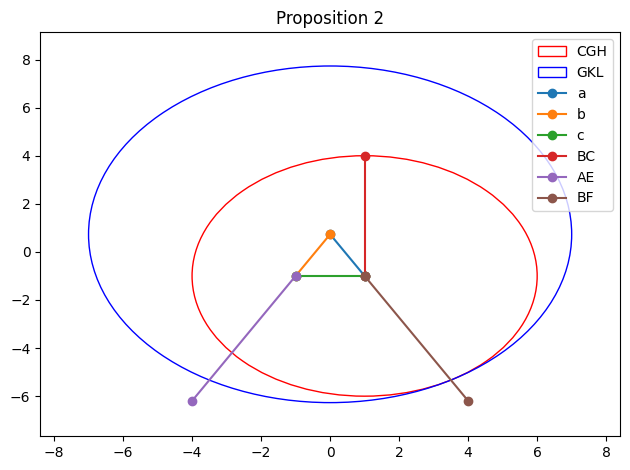

In [133]:
plot_2d([CGH, GKL, DAB, BC, AE, BF], ['CGH','GKL','DAB', 'BC', 'AE', 'BF'], colors=['red', 'blue', 'green', 'orange', 'purple', 'cyan'], title='Proposition 2', annotate=False)

# Proposition 3: For two given unqual straight-lines, to cut off from the greater a straight-line equal to the lesser.


The objective here is to take two lines of unequal length, and make a third line equal to the smaller line.

In [107]:
#Let AB and C be the two given unequal straight-lines, of which let the greater be AB.
A = Point2(0,0)
B = Point2(2,0)
AB = Line2E(A, B)
C = Line2E(Point2(-0.5, 2), Point2(0.5, 2))
# Draw a circle of radius length of AD and call it DEF
DEF = Circle2E(A, C.__len__())
D = extend_point2_circle_edge(DEF, A, 3*np.pi/4)
AD = Line2E(A, D)
#Cut off the line AE at the circle's intersection with AB
AE = Line2E(A, euclid._intersect_line2_circle(AB, DEF).p1)
# Since point A is the center of circle DEF, AE == AD
# But AD is equal to C
prop3_cond = AE.__len__() == C.__len__()
if prop3_cond:
    print("AE == C, The very thing it was required to do")

AE == C, The very thing it was required to do


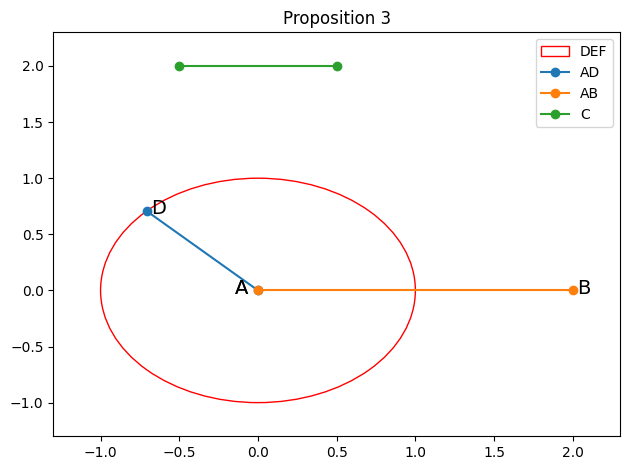

In [110]:
plot_2d([DEF, AD, AB, C], ['DEF','AD','AB', 'C'], colors=['red', 'blue', 'green'], title='Proposition 3')

In [ ]:
def prop_3(L1: Line2E, L2: Line2E):
    """
    Given two unequal lines, returns a line equal to the lesser of the two
    """
    if L1.__len__() == L2.__len__():
        print("Lines already equal")
        return None
    return None

# Proposition 4: 

If two triangles have two sides equal to two sides, respecitvely, and have angles enclosed by the equal straight-lines equal, then they will also have the base equal to the base, and the triangle will be equal to the triangle.

In [ ]:
T1 = Triangle.SAS(1, 30.0, 2)
T2 = Triangle.SAS(2, 30.0, 1)

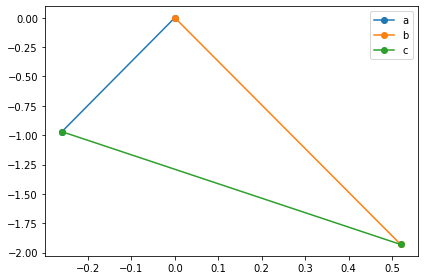

In [ ]:
#Draw Triangles
T1.plot()

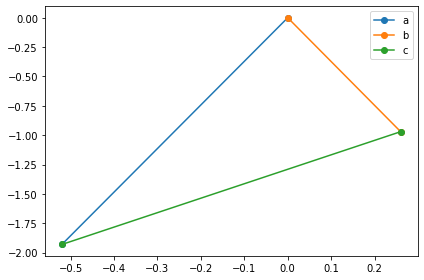

In [ ]:
T2.plot()

In [ ]:
T1.c.__len__() == T2.c.__len__()

True

# Proposition 5

For isosceles triangles, the angles at the base are equal to one another, and if the equal sides are produced then the angles under the base will be equal to one another.

In [ ]:
#Let ABC be an isosceles triangle having AB equal to AC

#Let straight-lines BD and CE have been produced in a straight-line with AB, AC

#Let point F be taken at random on BD

#Let AG have been cut off from the greater AE equal to AF

#Let straight-lines FC and GB have been joined

# Proposition 6: If a triangle has two equal angles equal to one another then the sides subtending the equal angles will also be equal to one another.

Before moving forward, it is important to define the term 'subtending'. 

> Specifically, an angle is said to subtend an arc or side when its two rays (or sides) extend from its vertex to the endpoints of the arc or side.

In [ ]:
test = Triangle.ASA(30.0, 1, 30.0)

In [ ]:
test.AB.__len__() == test.CA.__len__()

True

In [ ]:
test = Triangle.ASA(60.0, 1, 60.0)

In [ ]:
test.AB.__len__() == test.CA.__len__()

True

# Proposition 7: On the same straight-line, two other straight-lines equal, respectively, to two straight-lines cannot be constructed at a different point on the same side, but having the same ends as the given straight-lines

# Proposition 8: If two triangles have two sides equal to two sides, respectively, and also have the base equal to the base then they will also have equal the angles encompassed by the equal straight-lines.

In [ ]:
# Construct two triangles with three equal sides
T1 = Triangle.SSS(3,4,5)
T2 = Triangle.SSS(3,4,5)

90.0
90.0


In [ ]:
T1.gamma == T2.gamma and T1.alpha == T2.alpha and T1.beta == T2.beta

True

# Proposition 9: To cut a given rectilinear angle in half

In [ ]:
#Draw two lines, pick point at random, draw DE, construct equilateral, draw FA

#Let BAC be the given rectilinear angle. 

#Let the point D have been taken at random on AB

#Let AE, equal to AD, have been cut off from AC

# Proposition 10: To cut a given finite straight-line in half

In [ ]:
#LET AB BE THE GIVEN FINITE STRAIGHT-LINE.
AB = Line2E(Point2E(0.0, 0.0), Point2E(2.0, 0.0))

In [ ]:
ABC = draw_equilateral(AB)

2.0
C = 1.0, 1.7320508075688772
2.0
2.0
2.0


In [ ]:
CD = ABC.C.connect(AB)

In [ ]:
D = CD.p2

In [ ]:
AD = Line2E(A, D)
DB = Line2E(D,B)

In [ ]:
AD.__len__() == DB.__len__()

True

In [ ]:
np.degrees(ABC.b.v.angle(ABC.c.v))

120.00000000000001

In [ ]:
np.degrees(ABC.c.v.angle(ABC.a.v))

90.0

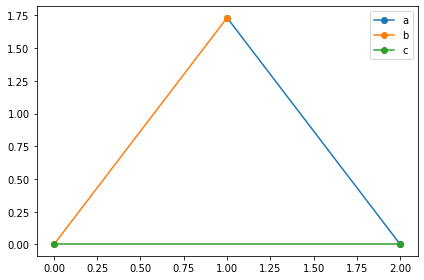

In [ ]:
ABC.plot()

In [ ]:
#Write function to cut line in half
def prop_10(line: Line2E):
    ABC = draw_equilateral(line)
    CD = ABC.C.connect(AB)
    D = CD.p2
    AD = Line2E(A, D)
    DB = Line2E(D,B)
    return AD, DB

# Proposition 11: To draw a straight-line at right-angles to a given straight-line from a given point on it.

In [ ]:
#AB be straight line, C given point on the line. Pick D at random, create CD, CE. 
#Construct equilateral FDE, join FC, check angles. Plot all this

In [ ]:
A = Point2E(0.0, 0.0)
B = Point2E(4.0, 0.0)
AB = Line2E(A, B)
C = Point2E(2.0, 0.0)
#Required to draw straight-line from the point C at right angle

In [ ]:
#Pick D at random on AC
#Make CE equal to CD using 1.3
#Construct equilateral triangle off of DE
#Construct FC
#Measure Angles

In [ ]:
# Plot
plt.axis([-3, 3, -3, 3])
#plt.axis("equal")

#BF
plt.plot([C.p1.x, C.p2.x], [C.p1.y, C.p2.y], marker='o', label='C')
plt.plot([AE.p1.x, AE.p2.x], [AE.p1.y, AE.p2.y], marker='o', label='AE')
plt.plot([AB.p1.x, AB.p2.x], [AB.p1.y, AB.p2.y], marker='o', label='AB')

#Lines
#plt.gca().add_artist(c3)
plt.title('Proposition 3')
plt.legend()
plt.show()
#plt.tight_layout()


# Proposition 12: To draw a straight-line perpendicular to a given infite straight-line from a given point which is not on it.

In [ ]:
#

# Proposition 13: If a straight-line stood on another straight-line makes angles, it will certainly either make two right angles or angle whose sum is equal to two right angles. 

In [ ]:
#Create lines CD, AB (random angle), EB (right angle) follow the logic and plot

In [ ]:
D = Point2E(0.0, 0.0)
C = Point2E(4.0, 0.0)
DC = Line2E(D,C)
A = Point2E(2.0, 2.0)

In [ ]:
AB1 = A.connect(DC)
B1 = AB1.p2
B1C = Line2E(B1, C)
B1D = Line2E(D, B1)

In [ ]:
np.degrees(AB1.v.angle(B1C.v)) == np.degrees(AB1.v.angle(B1D.v)) == 90.0

True

In [ ]:
#Pick B, connect with E and A, sum all the angles

1.5707963267948966

In [ ]:
#Plot
plt.axis([-3, 3, -3, 3])
#plt.axis("equal")


#BF
plt.plot([DC.p1.x, DC.p2.x], [DC.p1.y, DC.p2.y], marker='o', label='DC')
plt.plot([AB1.p1.x, AB1.p2.x], [AB1.p1.y, AB1.p2.y], marker='o', label='AB')
#draw right angles

#Lines
#plt.gca().add_artist(c3)
plt.title('Proposition 13')
plt.legend()
plt.show()
#plt.tight_layout()

# Proposition 14: If two straight-lines, not lying on the same side, make adjacent angles, whose sum is equal to two right angles with some straight-line, at a point on it, then the two straight-lines will be straight-on with respect to one another.

In [ ]:
#Create BC and BD
#Create AB
#Create EB
#Create Angles
#Show that AB and BE can't be straight on with CB and CD because of prop 13

# Proposition 15: If two straight-lines cut one another then they make the vertically opposite angles equal to one another. 

In [ ]:
DC = Line2E(Point2E(-1.0, 0.0), Point2E(1.0, 0.0))
AB = Line2E(Point2E(-1.0, 1.0), Point2E(1.0, -1.0))

In [ ]:
E = euclid._intersect_line2_line2(DC, AB)
AE = Line2E(Point2E(-1.0, 1.0), Point2E(E.x, E.y))
EB = Line2E(Point2E(E.x, E.y), Point2E(1.0, -1.0))

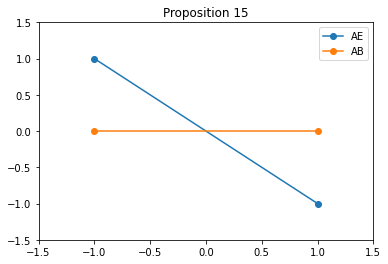

In [ ]:
plt.axis([-1.5, 1.5, -1.5, 1.5])
#plt.axis("equal")
#BF
plt.plot([AB.p1.x, AB.p2.x], [AB.p1.y, AB.p2.y], marker='o', label='AE')
plt.plot([DC.p1.x, DC.p2.x], [DC.p1.y, DC.p2.y], marker='o', label='AB')

#Lines
#plt.gca().add_artist(c3)
plt.title('Proposition 15')
plt.legend()
plt.show()

In [ ]:
#CHECK THAT VERTICALLY OPPOSITE ANGLES EQUAL
AE.v.angle(DC.v) == EB.v.angle(DC.v)

True

In [ ]:
#CHECK ROUNDED DEGREE VALUE IS AS EXPECTED
round(np.degrees(AE.v.angle(DC.v)), 2)

45.0

# Proposition 16: For any triangle, when one of the sides is produced, the the external angle is greater than each of the internal and opposite angles.

In [ ]:
#Let ABC be a triangle, let one of its sides BC extend to D
#Show that external angle ACD is greater than each of the internal and opposite angles CBA and BAC
#put in terms of the notebook
#cut AC in half at E

# Proposition 17: For any triangle, the sum of two angles taken together in any possible way is less than two right-angles.

In [ ]:

ABC = Triangle.SSS(3, 4, 5)
print(ABC.gamma + ABC.beta < 180)
print(ABC.gamma + ABC.alpha < 180)
print(ABC.beta + ABC.alpha < 180)

90.0
True
True
True


# Proposition 18: In any triangle, the greater side subtends the greater angle. 

This proposition is saying that given that one side is greater than the other, the corresponding angles must also hold the same inequality. 

90.0


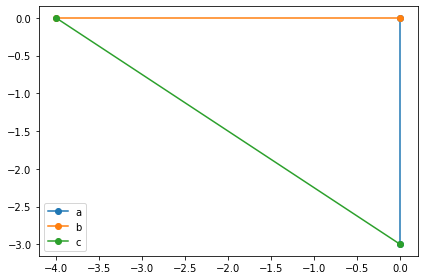

In [ ]:
ABC = Triangle.SSS(3, 4, 5)
ABC.plot()

In [ ]:
#ENSURE c has the greatest length
ABC.c.__len__() > ABC.b.__len__() and ABC.c.__len__() > ABC.a.__len__()

True

In [ ]:
#ENSURE ANGLE OF c (gamma) has greatest magnitude
ABC.gamma > ABC.alpha and ABC.gamma > ABC.beta

True

# Proposition 19: In any triangle, the greater angle is subtended by the greater side. 

This proposition is saying that given that one angle is greater than another, the corresponding sides must also hold the same inequality.

In [ ]:
#Show that when a triangle is created, the greatest angle subtends the greatest side

# Proposition 20: In any triangle, the sum of two sides taken together in any possible way is greater than the remaining side.

In [ ]:
ABC.AB_l + ABC.CB_l > ABC.CA_l

True

In [ ]:
ABC.AB_l + ABC.CA_l > ABC.CB_l

True

In [ ]:
ABC.AB.p2

Point2(1.00, 1.00)

In [ ]:
ABC.CA_l + ABC.CB_l > ABC.AB_l

True

# Sources

[1] Fitzpatrick, R. (2007). Euclid's Elements of Geometry: In English with an Introduction, and Notes. Springer Science & Business Media.

[2] Github repo